# Fast bidirectional vector wave propagation method (BWPM)


M. Wende, J. Drozella, and A. Herkommer, "Fast bidirectional vector wave propagation method showcased on targeted noise reduction in imaging fiber bundles using 3D-printed micro optics," Opt. Express  31, 28874-28890 (2023).

https://doi.org/10.1364/OE.497244



In [68]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [69]:
from diffractio import um, degrees
from diffractio import np, plt
from diffractio.diffractio import Diffractio
from py_pol.jones_vector import Jones_vector  


## BWPM

In [70]:
x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(0 * um, 300 * um, 1024)
wavelength = 10 * um

refractive_index = 1.5
refractive_index_background = 1

scale='scaled'
logarithm=1e0
has_edges = False


num_x = 1024
num_z = 1000


x0 = np.linspace(-100*um, 100*um, num_x)
z0 = np.linspace(0,200, num_z)

x_limits = (x0[0], x0[-1]  )
z_limits = (z0[0], z0[-1])

frame_x=dict(
    x=x0,
    wavelength = wavelength,
)

frame_z = dict(
    x=x0,
    z=z0,
    wavelength = wavelength,
)


In [71]:
# definition of polarization
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=0*degrees)
print(j0)

E = 
[+0.707]   
[+0.707]   



## Scalar

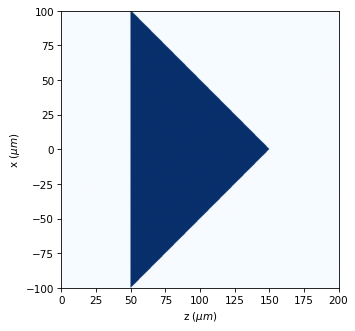

In [72]:
u0 = Diffractio('scalar', 'source', **frame_x)
u0.gauss_beam(A=1,
                x0=50 * um,
                z0=0 * um,
                w0=25 * um,
                theta=0. * degrees)


u_xz = Diffractio('scalar', 'mask', x=x0, z=z0, wavelength=wavelength)

u_xz.incident_field(u0)

u_xz.biprism(r0=(0 * um, 50 * um), length=200*um, height=200 * um/2, refractive_index=refractive_index, angle = 0*degrees)


u_xz.draw_refractive_index(scale=scale)


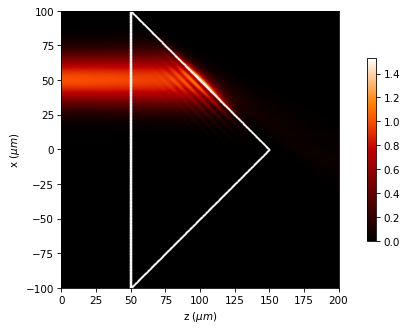

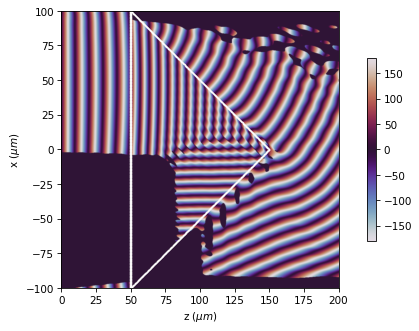

In [73]:
u_xz.WPM(has_edges=50, pow_edge=80,  verbose=False)
u_xz.draw('intensity', logarithm=0, scale=scale,  colorbar_kind='vertical',  draw_borders=True, percentage_intensity=0.01)
u_xz.draw('phase', logarithm=0, scale=scale,  colorbar_kind='vertical',  draw_borders=True, percentage_intensity=0.0001)



## Vector computation

**All the field: forward + backward**

In [74]:
# add vector incident field and refractive index to Vector_field_XZ

EH_xz = Diffractio('vector', 'field', **frame_z)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)

In [75]:
EH_xz_back = EH_xz.BWPM(has_edges = 50, verbose=False)

In [76]:
EH_xz_cut=EH_xz.cut_resample(x_limits=x_limits, z_limits=z_limits, new_field=True)
EH_xz_cut.surface_detection()

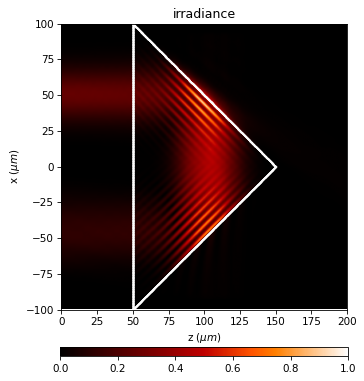

In [77]:
EH_xz.draw('irradiance', draw_borders=True, color='w.', ms=1, logarithm=0)

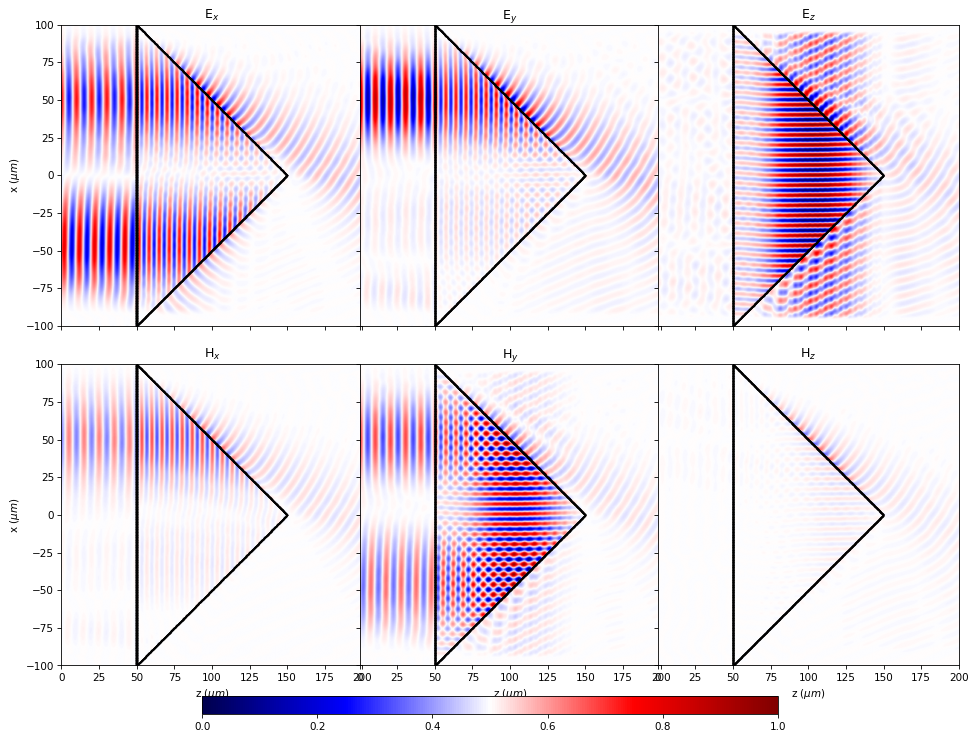

In [78]:
EH_xz.draw('EH', draw_borders=True, color='k.', ms=1, logarithm=0)

There is total reflection, but it is not complete since the beam is gaussian. If the refractive index is higher, there is total reflection.

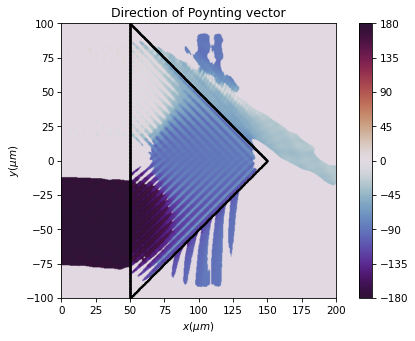

In [79]:
EH_xz.draw('directions', draw_borders=True, color='k.', ms=1, logarithm=0)

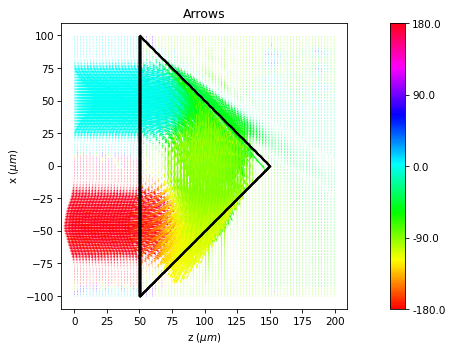

In [80]:
EH_xz.draw('arrows', draw_borders=True, color='k.', ms=1, logarithm=0, cmap='hsv', size_arrow=16, sep_x=6, sep_z=12)

**Only Backward fields**

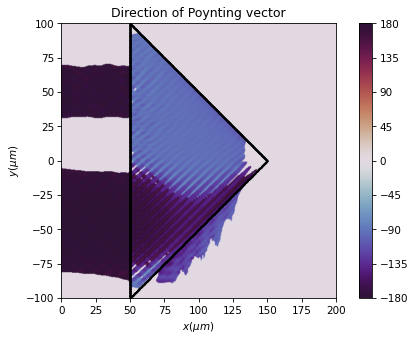

In [81]:
EH_xz_back.draw('directions', draw_borders=True, color='k.', ms=1, logarithm=0, percentage_intensity=0.1)

The upper backward propagation is due to reflection at the entrance, and the lower backward propagation is to the biprism.

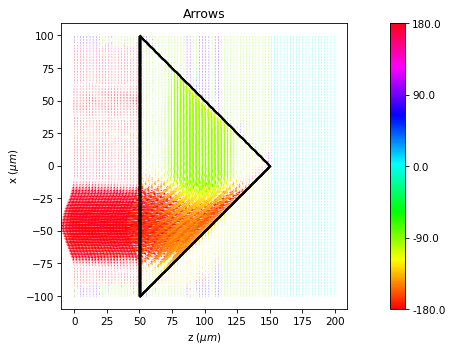

In [82]:
EH_xz_back.draw('arrows', draw_borders=True, color='k.', ms=1, logarithm=0, cmap='hsv', size_arrow=20, sep_x=6, sep_z=12)